# Lab 6
Majo Gil - 20337

Joshua Chicoj - 20566

In [13]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string



## Análisis exploratorio

In [5]:
file_path = "data/train.csv"
data = pd.read_csv(file_path)

In [6]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


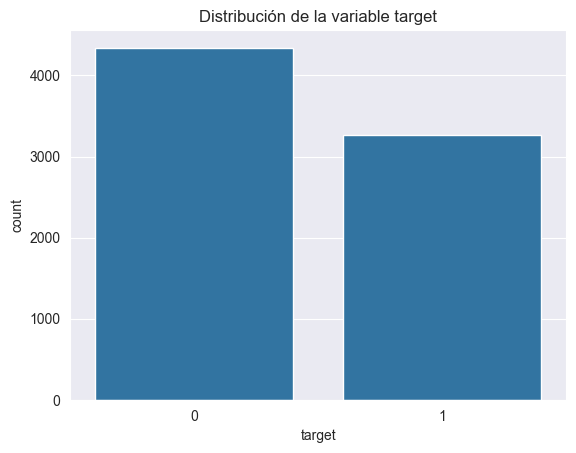

In [9]:
sns.countplot(x='target', data=data)
plt.title('Distribución de la variable target')
plt.show()

In [10]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

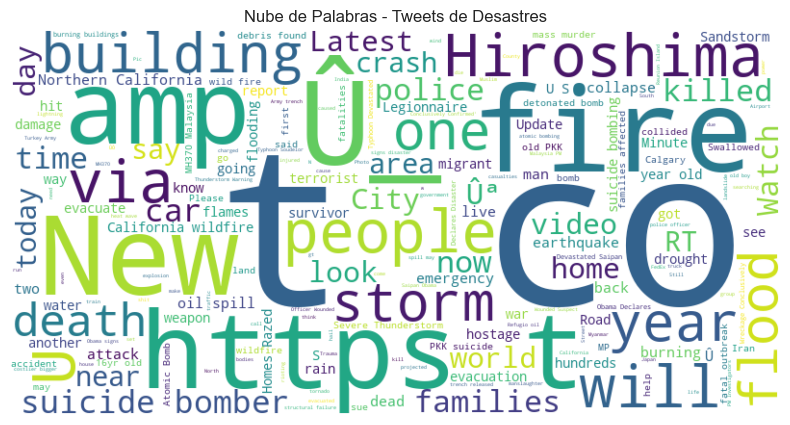

In [11]:
disaster_tweets = data[data['target'] == 1]['text']
non_disaster_tweets = data[data['target'] == 0]['text']

disaster_words = ' '.join(disaster_tweets)
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(disaster_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets de Desastres')
plt.axis('off')
plt.show()

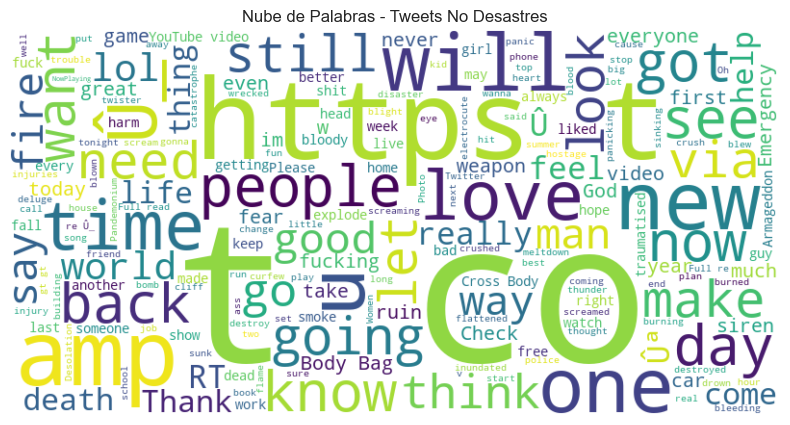

In [12]:
non_disaster_words = ' '.join(non_disaster_tweets)
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets No Desastres')
plt.axis('off')
plt.show()

## Limpieza de textos

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    return tokens

disaster_tweets_tokens = disaster_tweets.apply(clean_text)
non_disaster_tweets_tokens = non_disaster_tweets.apply(clean_text)

### Palabras comunes

In [12]:
disaster_word_freq = Counter([word for tokens in disaster_tweets_tokens for word in tokens])
non_disaster_word_freq = Counter([word for tokens in non_disaster_tweets_tokens for word in tokens])

common_words = set(disaster_word_freq.keys()).intersection(set(non_disaster_word_freq.keys()))

common_words_freq = {word: (disaster_word_freq[word], non_disaster_word_freq[word]) for word in common_words}

common_words_sorted = sorted(common_words_freq.items(), key=lambda x: x[1][0], reverse=True)

print("Palabras comunes más frecuentes en tweets de desastres y no desastres:")
for word, (freq_disaster, freq_non_disaster) in common_words_sorted[:10]:
    print(f"Palabra: {word}, Frecuencia en Desastres: {freq_disaster}, Frecuencia en No Desastres: {freq_non_disaster}")
